In [1]:
import numpy as np
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import time

import warnings
warnings.filterwarnings('ignore')

from Utils import PlotUtils

In [2]:
dataset = pd.read_csv('./Dataset/creditcard.csv')

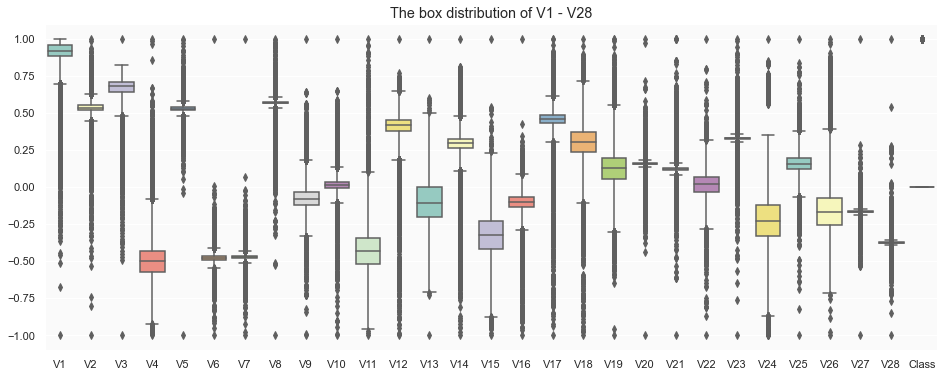

In [3]:
data = dataset.copy()
data = data.drop(["Amount","Time"],axis = 1)
df = copy.deepcopy(data)
scaler = MinMaxScaler(feature_range = (-1,1))
for i in range(1,29):
    df["V"+str(i)] = scaler.fit_transform(df["V"+str(i)].values.reshape(-1,1))
processed_dataset = df
PlotUtils.plot_distribution_box(processed_dataset)

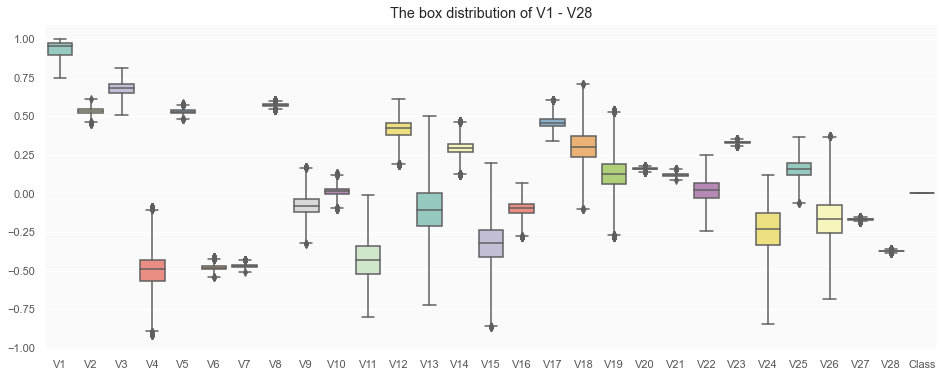

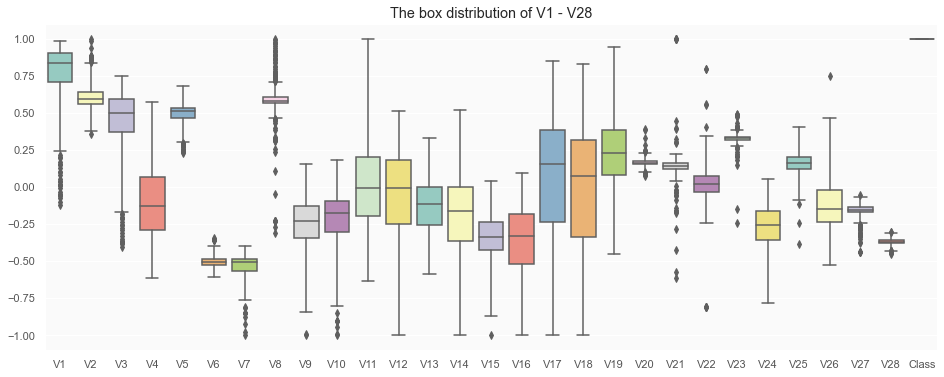

In [4]:
collist = ["V"+ str(i) for i in range(1,29)]
df2 = processed_dataset
df2fraud = df2[df2["Class"] == 1]
df2normal = df2[df2["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df2normal[column],25) # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df2normal[column],75)
    IQR = Q3-Q1 # calculate the interval 
    threshold = IQR * 2.5 # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df2normal= df2normal[(df2normal[column]>lower) & (df2normal[column]<upper)]
df2 = pd.concat([df2normal,df2fraud])
df2 = shuffle(df2) #shuffle the dataset 
df3 = data
df3fraud = df3[df3["Class"] == 1]
df3normal = df3[df3["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df3normal[column],25)    # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df3normal[column],75)
    IQR = Q3-Q1                          # calculate the interval 
    threshold = IQR * 2.5                # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df3normal= df3normal[(df3normal[column]>lower) & (df3normal[column]<upper)]
df3 = pd.concat([df3normal,df3fraud])
df3 = shuffle(df3) 
processed_dataset = df3
PlotUtils.plot_distribution_box(df2normal)
PlotUtils.plot_distribution_box(df2fraud)

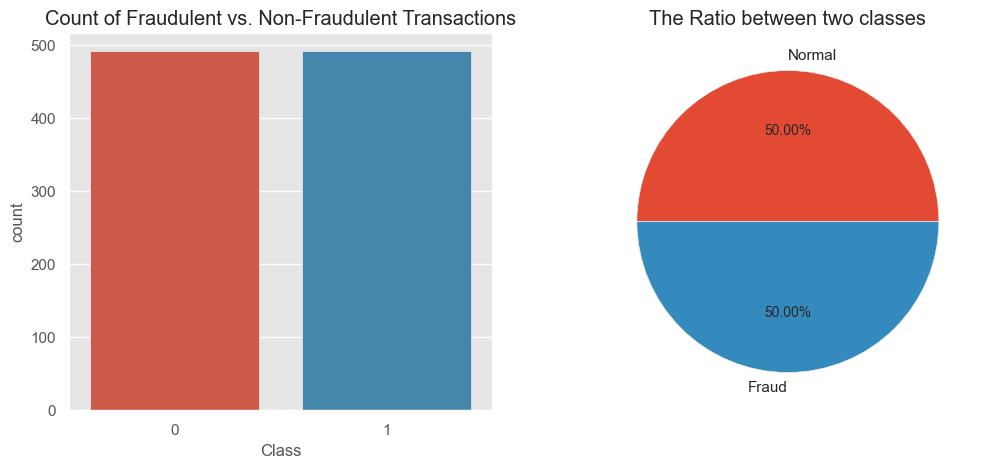

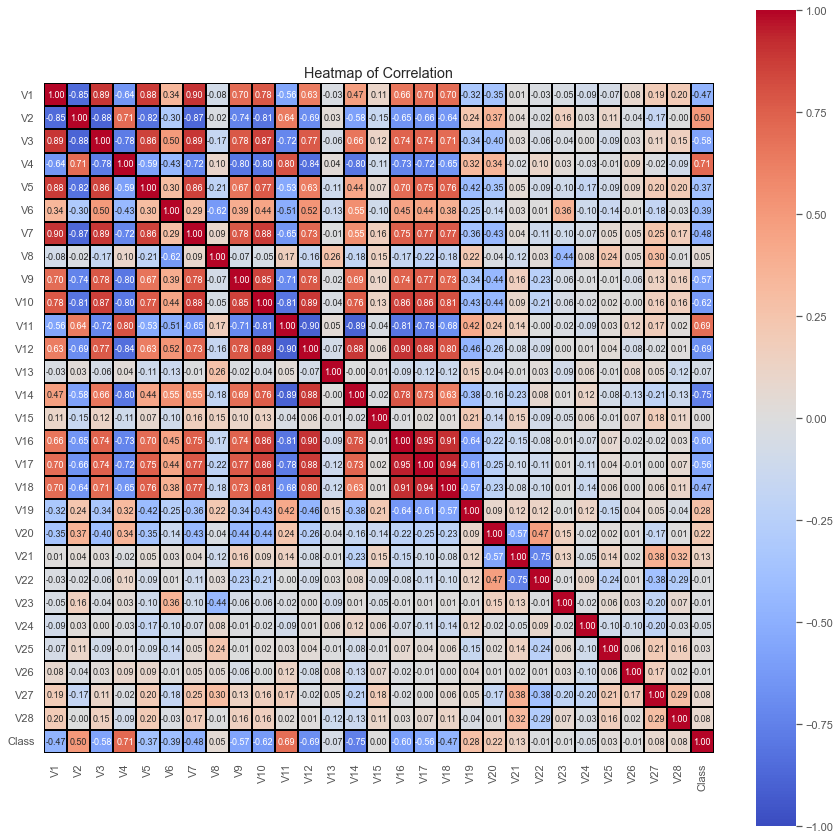

In [5]:
# Balancing (Random Under-Sampling)
Normal = processed_dataset[processed_dataset["Class"] == 0]
Fraud = processed_dataset[processed_dataset["Class"] == 1]
RUSNormal = Normal.iloc[:processed_dataset[processed_dataset["Class"] == 1]["Class"].count()]
RUSFraud = Fraud
RUSdata = pd.concat([RUSNormal,RUSFraud])
RUSdata = shuffle(RUSdata)
scaler = MinMaxScaler(feature_range = (-1,1))
for i in range(1,29):
    RUSdata["V"+str(i)] = scaler.fit_transform(RUSdata["V"+str(i)].values.reshape(-1,1))
# RUSdata.head()
processed_dataset = RUSdata
PlotUtils.plot_CountByClass(processed_dataset)
PlotUtils.plot_heatmap(processed_dataset)

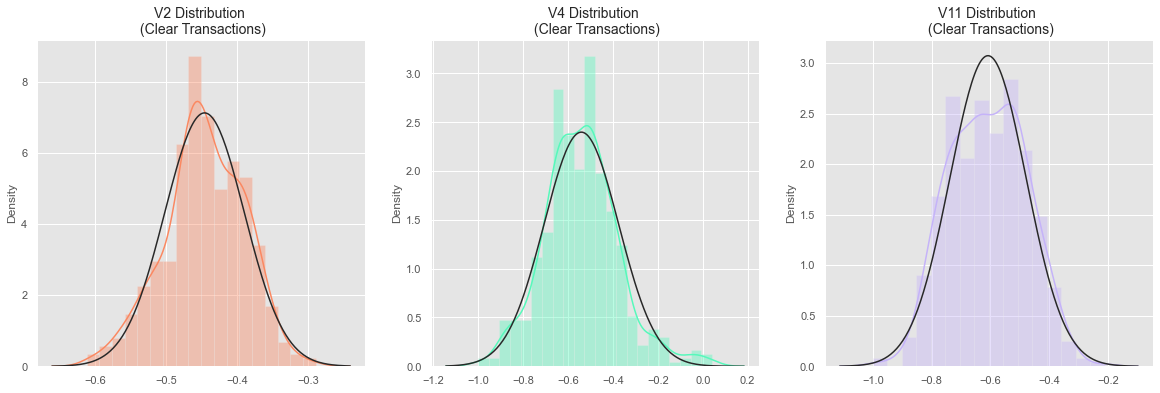

In [6]:
PlotUtils.plot_multipe_distributions(processed_dataset, ["V2","V4","V11"], 0)

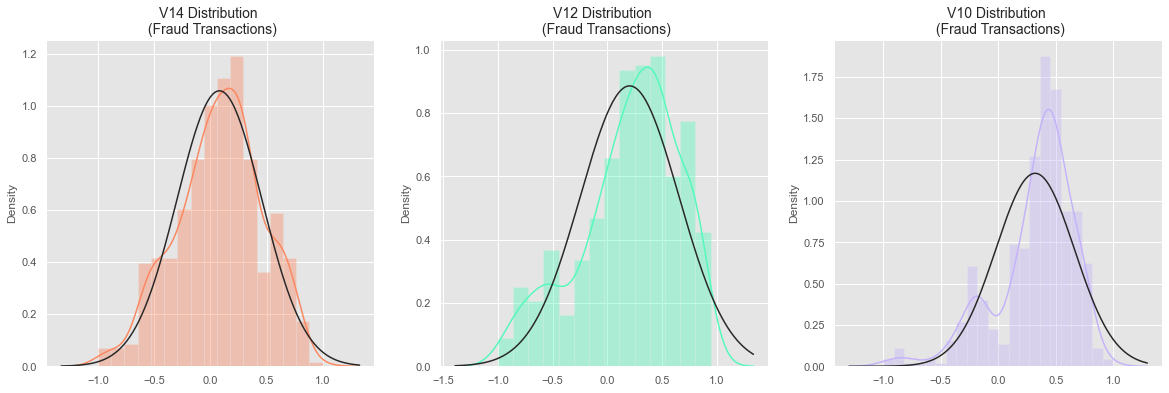

In [7]:
PlotUtils.plot_multipe_distributions(processed_dataset, ["V14","V12","V10"], 1)

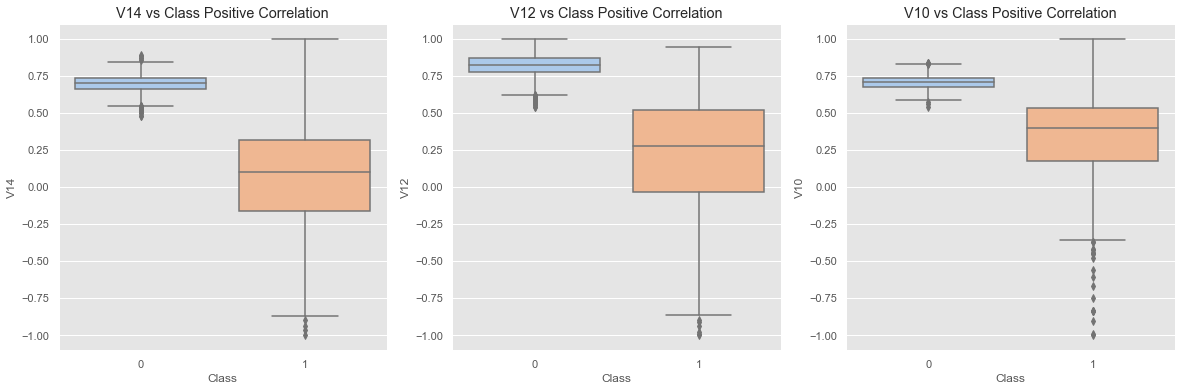

In [8]:
PlotUtils.plot_multipe_distribution_box(processed_dataset, ["V14","V12","V10"])

V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

Quartile 25: -0.1594907847132925 | Quartile 75: 0.318062502119232
iqr: 0.4775532868325245
Cut Off: 0.7163299302487868
V14 Lower: -0.8758207149620792
V14 Upper: 1.0343924323680187
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-1.0, -0.9653755466782117, -0.9363940357639713, -0.8972202165283434]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -0.8700833421188375
V12 Upper: 1.3703320859483474
V12 outliers: [-0.9755237046608287, -0.987400806348476, -1.0, -0.9383577823761748]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -0.3228853792842918
V10 Upper: 1.062118050517662
V10 outliers: [-0.832201309869173, -1.0, -0.98706642

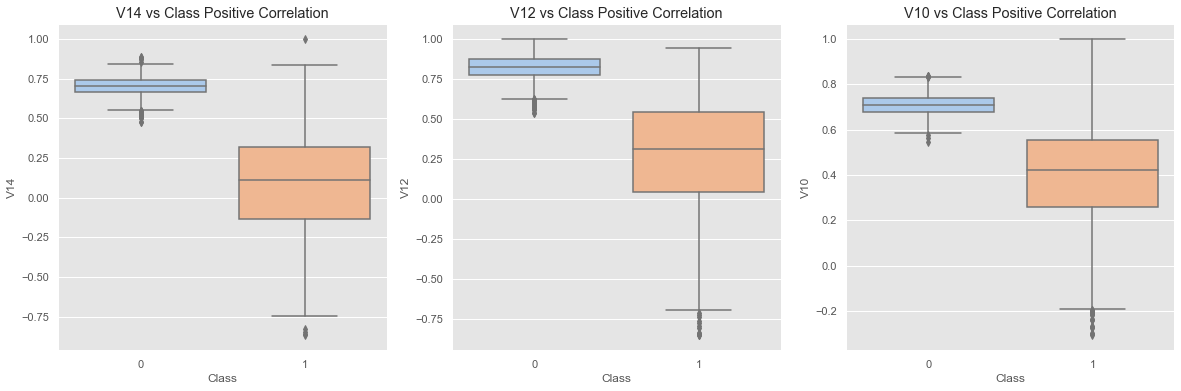

In [9]:
v14_fraud = processed_dataset['V14'].loc[processed_dataset['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))
processed_dataset = processed_dataset.drop(processed_dataset[(processed_dataset['V14'] > v14_upper) | (processed_dataset['V14'] < v14_lower)].index)
print('----' * 44)
# -----> V12 removing outliers from fraud transactions
v12_fraud = processed_dataset['V12'].loc[processed_dataset['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
processed_dataset = processed_dataset.drop(processed_dataset[(processed_dataset['V12'] > v12_upper) | (processed_dataset['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(processed_dataset)))
print('----' * 44)
# -----> Removing outliers V10 Feature
v10_fraud = processed_dataset['V10'].loc[processed_dataset['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
processed_dataset = processed_dataset.drop(processed_dataset[(processed_dataset['V10'] > v10_upper) | (processed_dataset['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(processed_dataset)))
# Boxplots with outliers removed
PlotUtils.plot_multipe_distribution_box(processed_dataset, ["V14", "V12", "V10"])

In [10]:
processed_dataset["Time"] = dataset["Time"]
processed_dataset.to_csv('./Dataset/processed_creditcard.csv')